### Importing library files

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
data = pd.read_csv('insurance.csv')

### Displaying the dataset

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Size of the dataset

In [4]:
data.shape

(1338, 7)

### Renaming a column in the dataset

In [5]:
data.rename(columns = {'sex': 'gender'}, inplace = True)

### Checking the dataset for missing values

In [6]:
data.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking the data type of the attributes

In [7]:
data.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Basic descriptive statistics of numerical attributes

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualization of the features with respect to charges

- **Age**

In [9]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

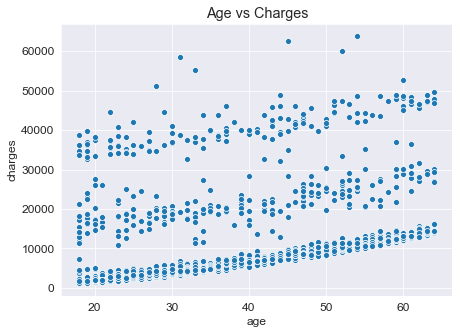

In [10]:
plt.title('Age vs Charges')
sns.scatterplot(data['age'], data['charges']);

We can notice that older persons tends to pay slightly more premium charges.

- **BMI**

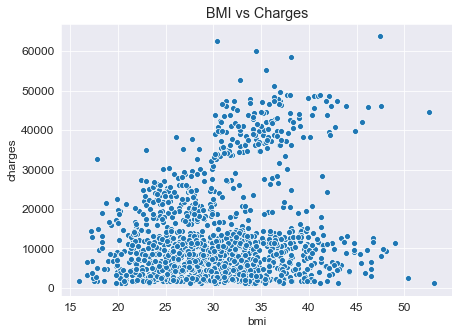

In [11]:
plt.title('BMI vs Charges')
sns.scatterplot(data['bmi'], data['charges']);

When bmi is 30 or more, there is a high probablity of charging more premium.

- **Smoker**

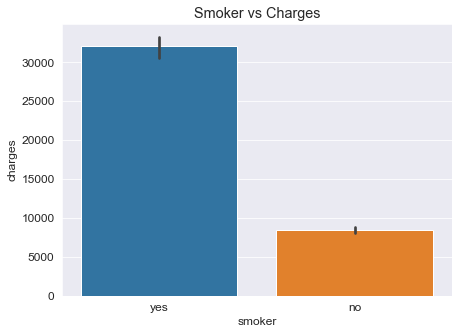

In [12]:
plt.title('Smoker vs Charges')
sns.barplot(data['smoker'], data['charges']);

We can notice that smokers are charged more as compared to non-smokers.  

- **Children**

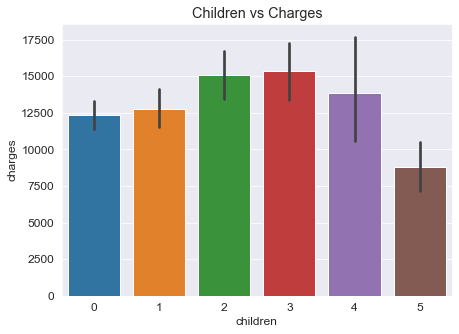

In [13]:
plt.title('Children vs Charges')
sns.barplot(data['children'], data['charges']);

We can say that person having 2 or 3 children tend to pay more. But surprisingly, person having 5 children pays the least insurance charges. 

- **Gender**

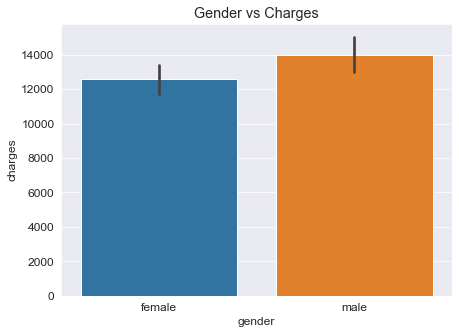

In [14]:
plt.title('Gender vs Charges')
sns.barplot(data['gender'], data['charges']);

There is very less difference between the average cost paid by male and female.

- **Region**

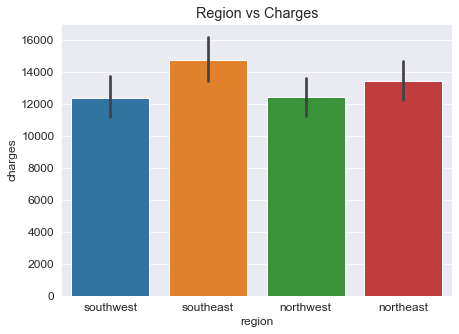

In [15]:
plt.title('Region vs Charges')
sns.barplot(data['region'], data['charges']);

It can be seen that persons of southeast and notheast region pays more premium charges.

### Transforming  categorical data(sex, smoker, region) into numerical data using OneHot Encoder

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
data = ct.fit_transform(data)
data

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

### Creating another dataframe with transformed values

In [17]:
df = pd.DataFrame(data, columns=['female', 'male', 'non-smoker', 'smoker', 'northeast region', 'northwest region', 'southeast region', 'southwest region', 'age', 'bmi', 'children', 'charges'])

### Displaying the dataframe

In [18]:
df.head(10)

,female,male,non-smoker,smoker,northeast region,northwest region,southeast region,southwest region,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,31.0,25.740,0.0,3756.62160
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,46.0,33.440,1.0,8240.58960
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,37.0,27.740,3.0,7281.50560
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,37.0,29.830,2.0,6406.41070
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,60.0,25.840,0.0,28923.13692


### Initialising feature variable and dependent variable

In [19]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the training set and test set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 42)

### Training the Random Forest Regressor Model on the training set

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Predicting the Test Results

In [22]:
y_pred = regressor.predict(x_test)

### Creating a dataframe to compare the Actual cost with the Predicted cost

In [23]:
frame = pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred})

### Displaying the dataframe

In [24]:
frame.head(20)

,Actual Cost,Predicted Cost
0,9095.06825,9898.787667
1,5272.17580,5426.081448
2,29330.98315,28283.102401
3,9301.89355,11038.414671
4,33750.29180,34911.028520
5,4536.25900,9771.447055
6,2117.33885,2118.497207
7,14210.53595,14333.295368
8,3732.62510,6802.098015
9,10264.44210,10885.172491


### Evaluating the performance of the model

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= regressor, X = x_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 83.00 %


### Visualization of the performance of the model

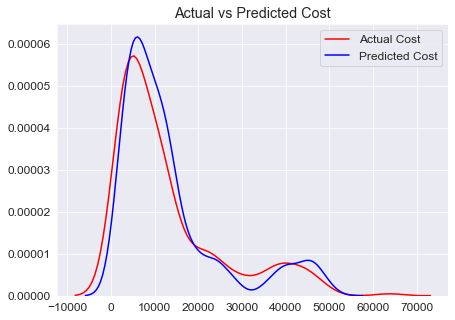

In [26]:
plt.title('Actual vs Predicted Cost')
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Cost")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Cost" , ax=ax);